# Task 3

## Imports

In [40]:
import torch
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm
import ultralytics
import os
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import pandas as pd
import cv2
from IPython.display import Image
from ultralytics import YOLO
import pickle

ultralytics.checks()


Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Setup complete ✅ (8 CPUs, 15.4 GB RAM, 524.8/620.0 GB disk)


## Defining functions

In [41]:
def render(image):
    if image.dtype == np.float64:
        image = cv2.convertScaleAbs(image)
    if len(image.shape) == 3 and image.shape[2] == 3: # BGR or RGB
        if np.array_equal(image[:, :, 0], image[:, :, 2]):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_bytes = cv2.imencode('.png', image)[1].tobytes()
    display(Image(data=img_bytes))
    
def loadImage(num, imgLoadSizeRatio = 1, dataDir = 'data/imgs', standardSize = -1):
    img = cv2.imread(os.path.join(dataDir, f'{num}'))
    if standardSize > 0:
        img = cv2.resize(img, (standardSize, standardSize))
    elif imgLoadSizeRatio != 1:
        img = cv2.resize(img, (0, 0), fx = imgLoadSizeRatio, fy = imgLoadSizeRatio)
    return img

def get_file_names(directory):
    file_names = []
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            file_names.append(filename)
    return file_names
    
def run_yolo(yolo, image_url, conf=0.25, iou=0.7):
    results = yolo(image_url, conf=conf, iou=iou, verbose=False)
    img = cv2.cvtColor(results[0].plot()[:, :, [2,1,0]], cv2.COLOR_BGR2RGB)
    bounding_boxes = results[0].boxes.xyxy.tolist()
    return bounding_boxes

def drawBB(img, bbs):
    img = img.copy()
    for bb in bbs:
        x1, y1, x2, y2 = [int(x) for x in bb]
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return img

In [42]:
# Create folder to save the results
try:
    folder_name = "results"
    os.mkdir(folder_name)
except FileExistsError:
    pass

## Load YOLO model

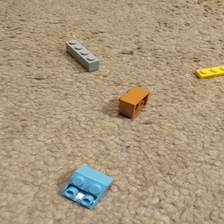

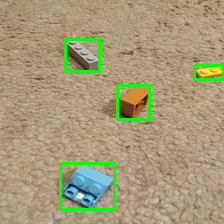

In [43]:
test_image = 'datasets/images/valid/4_1.jpg'
yolo = YOLO('yolov8s.pt')

bbs = run_yolo(yolo, test_image)
img = loadImage('4_1.jpg')
render(img)
img_bb = drawBB(img, bbs)
render(img_bb)

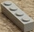

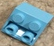

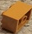

In [44]:
bb_imgs = []

def getBBImages(image, bbs):
    for bb in bbs:
        x1, y1, x2, y2 = [int(x) for x in bb]
        cropped = image[y1:y2, x1:x2]
        bb_imgs.append(cropped)

        

getBBImages(img, bbs)

for i in bb_imgs:
    render(i)